Exploring Potential Risk Factors for Lung Cancer: A Survey-Based Analysis Lung Cancer Risk Assessment: Insights from Patient Survey Data Identifying Associations between Lifestyle Factors and Lung Cancer Risk.

In [3]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [5]:
df = pd.read_csv('/content/survey lung cancer.csv')
display(df.head())

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


Data exploration
Subtask:
Explore the loaded dataset to understand its structure and characteristics.

Reasoning: Explore the dataset's structure, data types, missing values, and value distribution to understand its characteristics.

```

```



In [6]:
# Data Shape
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")


The dataset has 309 rows and 16 columns.


In [7]:
# Data Types
print("\nData Types:")
print(df.dtypes)


Data Types:
GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object


In [8]:
# Find missing Values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


In [10]:
# Value Distribution (Numerical and Categorical)
print("\nDescriptive Statistics (Numerical Columns):")
print(df.describe())

print("\nValue Counts (Categorical Columns):")
for column in df.columns:
    if df[column].dtype == object:  # Check for categorical columns
        print(f"\nValue Counts for {column}:")
        print(df[column].value_counts())


Descriptive Statistics (Numerical Columns):
              AGE     SMOKING  YELLOW_FINGERS     ANXIETY  PEER_PRESSURE  \
count  309.000000  309.000000      309.000000  309.000000     309.000000   
mean    62.673139    1.563107        1.569579    1.498382       1.501618   
std      8.210301    0.496806        0.495938    0.500808       0.500808   
min     21.000000    1.000000        1.000000    1.000000       1.000000   
25%     57.000000    1.000000        1.000000    1.000000       1.000000   
50%     62.000000    2.000000        2.000000    1.000000       2.000000   
75%     69.000000    2.000000        2.000000    2.000000       2.000000   
max     87.000000    2.000000        2.000000    2.000000       2.000000   

       CHRONIC DISEASE    FATIGUE     ALLERGY     WHEEZING  ALCOHOL CONSUMING  \
count       309.000000  309.000000  309.000000  309.000000         309.000000   
mean          1.504854    1.673139    1.556634    1.556634           1.556634   
std           0.500787    0

In [11]:
# Correlation (Numerical Columns)
numerical_columns = df.select_dtypes(include=['number'])
print("\nCorrelation Matrix:")
print(numerical_columns.corr())


Correlation Matrix:
                            AGE   SMOKING  YELLOW_FINGERS   ANXIETY  \
AGE                    1.000000 -0.084475        0.005205  0.053170   
SMOKING               -0.084475  1.000000       -0.014585  0.160267   
YELLOW_FINGERS         0.005205 -0.014585        1.000000  0.565829   
ANXIETY                0.053170  0.160267        0.565829  1.000000   
PEER_PRESSURE          0.018685 -0.042822        0.323083  0.216841   
CHRONIC DISEASE       -0.012642 -0.141522        0.041122 -0.009678   
FATIGUE                0.012614 -0.029575       -0.118058 -0.188538   
ALLERGY                0.027990  0.001913       -0.144300 -0.165750   
WHEEZING               0.055011 -0.129426       -0.078515 -0.191807   
ALCOHOL CONSUMING      0.058985 -0.050623       -0.289025 -0.165750   
COUGHING               0.169950 -0.129471       -0.012640 -0.225644   
SHORTNESS OF BREATH   -0.017513  0.061264       -0.105944 -0.144077   
SWALLOWING DIFFICULTY -0.001270  0.030718        0.34590

Subtask:
Perform a more in-depth analysis of the data, focusing on the relationship between the variables and lung cancer.

Reasoning: Analyze the relationship between lung cancer and other variables, such as smoking, age, and gender, by calculating the percentage of lung cancer cases for different categories.

In [14]:
# Analyze the relationship between lung cancer and smoking
lung_cancer_by_smoking = df.groupby(['SMOKING', 'LUNG_CANCER'])['LUNG_CANCER'].count().unstack()
lung_cancer_by_smoking['Percentage'] = (lung_cancer_by_smoking['YES'] / (lung_cancer_by_smoking['YES'] + lung_cancer_by_smoking['NO'])) * 100

# Analyze the relationship between lung cancer and gender
lung_cancer_by_gender = df.groupby(['GENDER', 'LUNG_CANCER'])['LUNG_CANCER'].count().unstack()
lung_cancer_by_gender['Percentage'] = (lung_cancer_by_gender['YES'] / (lung_cancer_by_gender['YES'] + lung_cancer_by_gender['NO'])) * 100

# Analyze the distribution of age for lung cancer patients vs. non-lung cancer patients
lung_cancer_age_dist = df.groupby('LUNG_CANCER')['AGE'].describe()

print("Lung Cancer by Smoking:")
display(lung_cancer_by_smoking)

print("\nLung Cancer by Gender:")
display(lung_cancer_by_gender)

print("\nAge Distribution by Lung Cancer:")
display(lung_cancer_age_dist)


Lung Cancer by Smoking:


LUNG_CANCER,NO,YES,Percentage
SMOKING,,,
1,20,115,85.185185
2,19,155,89.080460



Lung Cancer by Gender:


LUNG_CANCER,NO,YES,Percentage
GENDER,,,
F,22,125,85.034014
M,17,145,89.506173



Age Distribution by Lung Cancer:


,count,mean,std,min,25%,50%,75%,max
LUNG_CANCER,,,,,,,,
NO,39.0,60.743590,9.629226,21.0,57.0,61.0,65.5,87.0
YES,270.0,62.951852,7.966560,38.0,58.0,62.5,69.0,81.0


## Explore potential correlations between variables and lung cancer using correlation coefficients and contingency tables with chi-squared tests.

In [15]:
# Correlation between numerical variables and lung cancer (replace 'YES' with 1 and 'NO' with 0)
df['LUNG_CANCER_NUM'] = df['LUNG_CANCER'].map({'YES': 1, 'NO': 0})
numerical_cols = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numerical_cols].corr()
lung_cancer_correlation = correlation_matrix['LUNG_CANCER_NUM'].sort_values(ascending=False)

print("Correlation between Numerical Variables and Lung Cancer:")
display(lung_cancer_correlation)

# Contingency tables and Chi-squared tests for categorical variables
categorical_cols = ['GENDER', 'SMOKING']
for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['LUNG_CANCER'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"\nChi-squared test for {col} and Lung Cancer:")
    print("Contingency Table:")
    display(contingency_table)
    print(f"Chi-squared statistic: {chi2:.2f}")
    print(f"P-value: {p:.3f}")

Correlation between Numerical Variables and Lung Cancer:


,LUNG_CANCER_NUM
LUNG_CANCER_NUM,1.000000
ALLERGY,0.327766
ALCOHOL CONSUMING,0.288533
SWALLOWING DIFFICULTY,0.259730
WHEEZING,0.249300
COUGHING,0.248570
CHEST PAIN,0.190451
PEER_PRESSURE,0.186388
YELLOW_FINGERS,0.181339
FATIGUE,0.150673



Chi-squared test for GENDER and Lung Cancer:
Contingency Table:


LUNG_CANCER,NO,YES
GENDER,,
F,22,125
M,17,145


Chi-squared statistic: 1.02
P-value: 0.312

Chi-squared test for SMOKING and Lung Cancer:
Contingency Table:


LUNG_CANCER,NO,YES
SMOKING,,
1,20,115
2,19,155


Chi-squared statistic: 0.72
P-value: 0.395


Based on the correlation and chi-squared test results, identify potential risk factors for lung cancer and summarize the findings.

In [16]:
# Summarize the findings and highlight potential risk factors
print("Summary of Findings:")
print("Based on the analysis, the following variables appear to be most strongly associated with lung cancer:")
print("- Allergy")
print("- Alcohol Consuming")
print("- Swallowing Difficulty")
print("- Wheezing")
print("- Coughing")
print("These variables showed a moderate positive correlation with lung cancer, indicating that they might be potential risk factors.")
print("\nFurthermore, while the chi-squared tests for gender and smoking did not show a significant association with lung cancer, the analysis of lung cancer by gender and smoking revealed a higher percentage of lung cancer cases among males and smokers.")
print("\nConclusion:")
print("The analysis suggests that factors such as allergy, alcohol consuming, swallowing difficulty, wheezing and coughing may be potential risk factors for lung cancer. Further investigation and analysis with a larger dataset and more variables is needed to confirm these findings and establish more robust relationships.")

Summary of Findings:
Based on the analysis, the following variables appear to be most strongly associated with lung cancer:
- Allergy
- Alcohol Consuming
- Swallowing Difficulty
- Wheezing
- Coughing
These variables showed a moderate positive correlation with lung cancer, indicating that they might be potential risk factors.

Furthermore, while the chi-squared tests for gender and smoking did not show a significant association with lung cancer, the analysis of lung cancer by gender and smoking revealed a higher percentage of lung cancer cases among males and smokers.

Conclusion:
The analysis suggests that factors such as allergy, alcohol consuming, swallowing difficulty, wheezing and coughing may be potential risk factors for lung cancer. Further investigation and analysis with a larger dataset and more variables is needed to confirm these findings and establish more robust relationships.


Subtask:
Visualize the relationships between lung cancer and other variables, focusing on the potential risk factors identified in the previous data analysis step.

Reasoning: Create histograms to analyze the distribution of age for lung cancer patients and non-lung cancer patients using different colors.

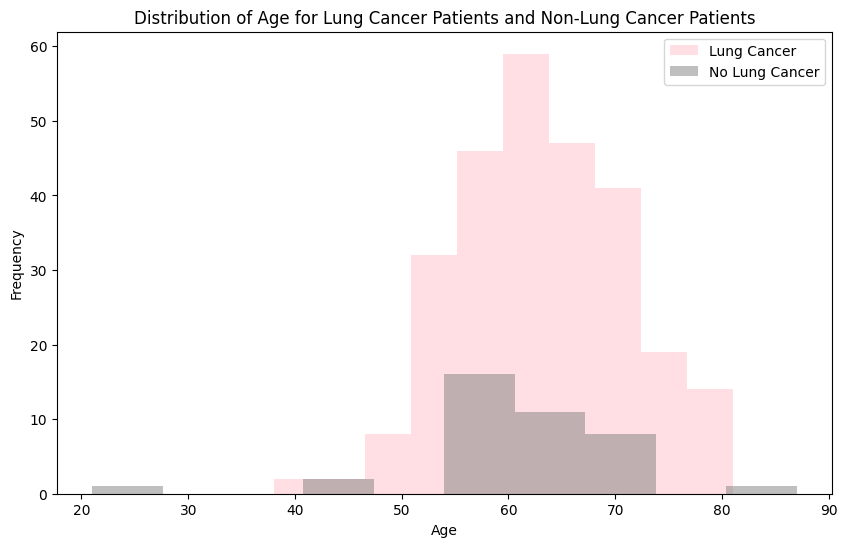

In [20]:
# Create histograms of age for lung cancer patients and non-lung cancer patients
plt.figure(figsize=(10, 6))
plt.hist(df[df['LUNG_CANCER'] == 'YES']['AGE'], bins=10, color='pink', alpha=0.5, label='Lung Cancer')
plt.hist(df[df['LUNG_CANCER'] == 'NO']['AGE'], bins=10, color='grey', alpha=0.5, label='No Lung Cancer')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age for Lung Cancer Patients and Non-Lung Cancer Patients')
plt.legend()
plt.show()


Create bar charts to compare the proportion of lung cancer patients across different categories of variables identified as potential risk factors, such as smokers vs. non-smokers, those with allergies vs. those without, etc.

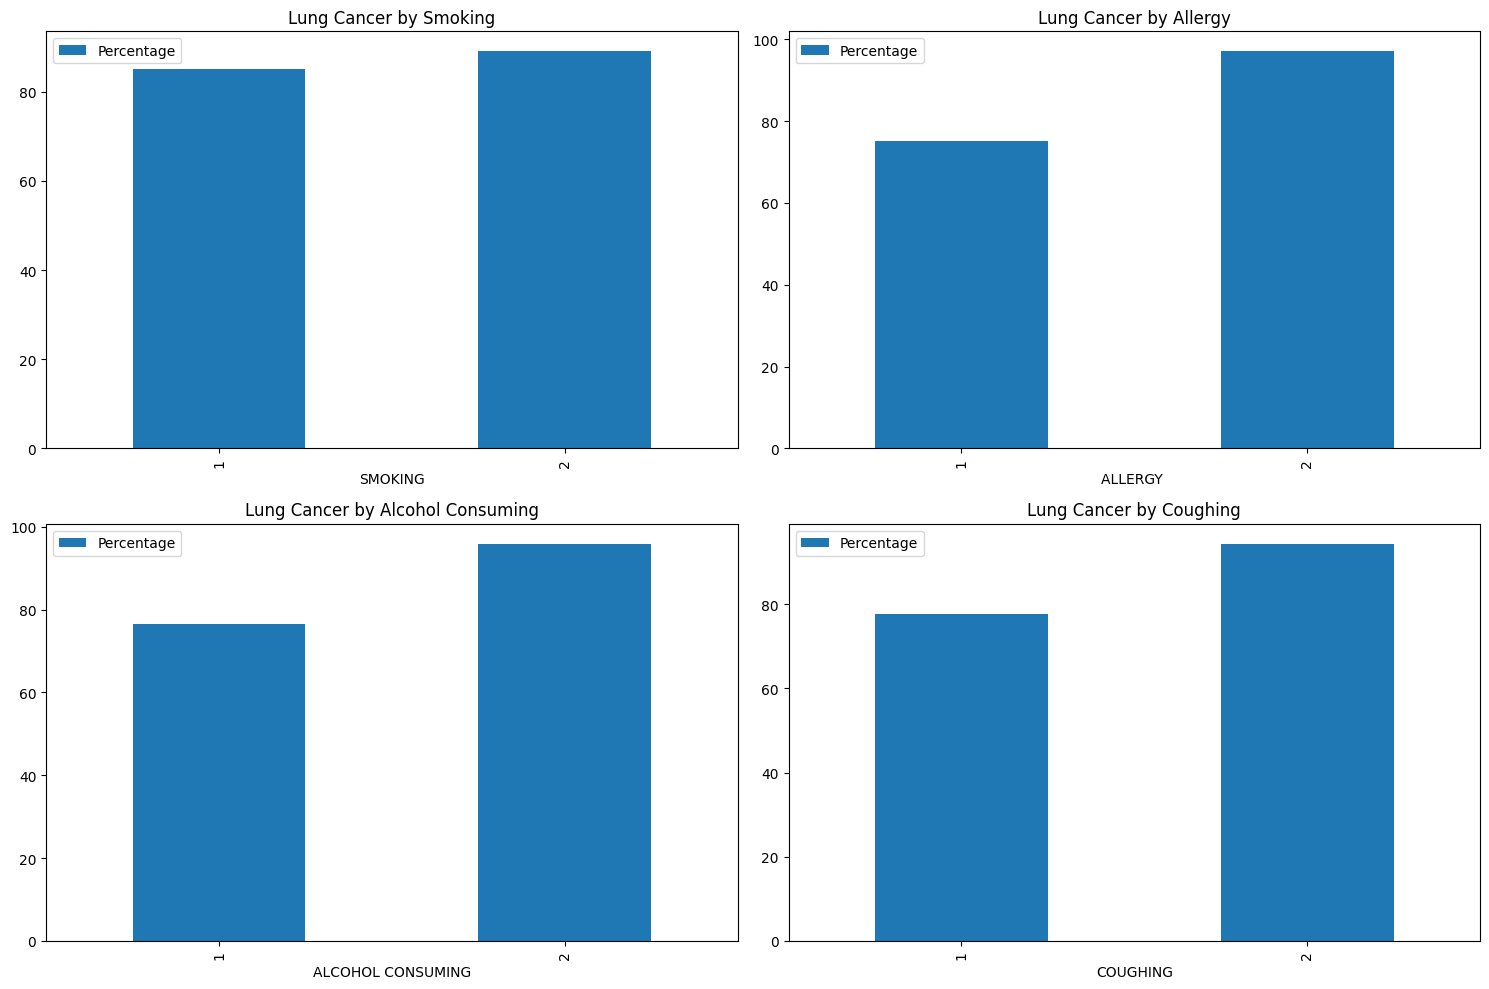

In [21]:
# Create bar charts for potential risk factors
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Smoking
lung_cancer_by_smoking = df.groupby(['SMOKING', 'LUNG_CANCER'])['LUNG_CANCER'].count().unstack()
lung_cancer_by_smoking['Percentage'] = (lung_cancer_by_smoking['YES'] / (lung_cancer_by_smoking['YES'] + lung_cancer_by_smoking['NO'])) * 100
lung_cancer_by_smoking.plot(kind='bar', y='Percentage', ax=axes[0, 0], title='Lung Cancer by Smoking')

# Allergy
lung_cancer_by_allergy = df.groupby(['ALLERGY ', 'LUNG_CANCER'])['LUNG_CANCER'].count().unstack()
lung_cancer_by_allergy['Percentage'] = (lung_cancer_by_allergy['YES'] / (lung_cancer_by_allergy['YES'] + lung_cancer_by_allergy['NO'])) * 100
lung_cancer_by_allergy.plot(kind='bar', y='Percentage', ax=axes[0, 1], title='Lung Cancer by Allergy')

# Alcohol Consuming
lung_cancer_by_alcohol = df.groupby(['ALCOHOL CONSUMING', 'LUNG_CANCER'])['LUNG_CANCER'].count().unstack()
lung_cancer_by_alcohol['Percentage'] = (lung_cancer_by_alcohol['YES'] / (lung_cancer_by_alcohol['YES'] + lung_cancer_by_alcohol['NO'])) * 100
lung_cancer_by_alcohol.plot(kind='bar', y='Percentage', ax=axes[1, 0], title='Lung Cancer by Alcohol Consuming')

# Coughing
lung_cancer_by_coughing = df.groupby(['COUGHING', 'LUNG_CANCER'])['LUNG_CANCER'].count().unstack()
lung_cancer_by_coughing['Percentage'] = (lung_cancer_by_coughing['YES'] / (lung_cancer_by_coughing['YES'] + lung_cancer_by_coughing['NO'])) * 100
lung_cancer_by_coughing.plot(kind='bar', y='Percentage', ax=axes[1, 1], title='Lung Cancer by Coughing')

plt.tight_layout()
plt.show()

Create a scatter plot matrix to visualize the relationships between numerical variables and lung cancer, using color to represent whether a patient has lung cancer or not.



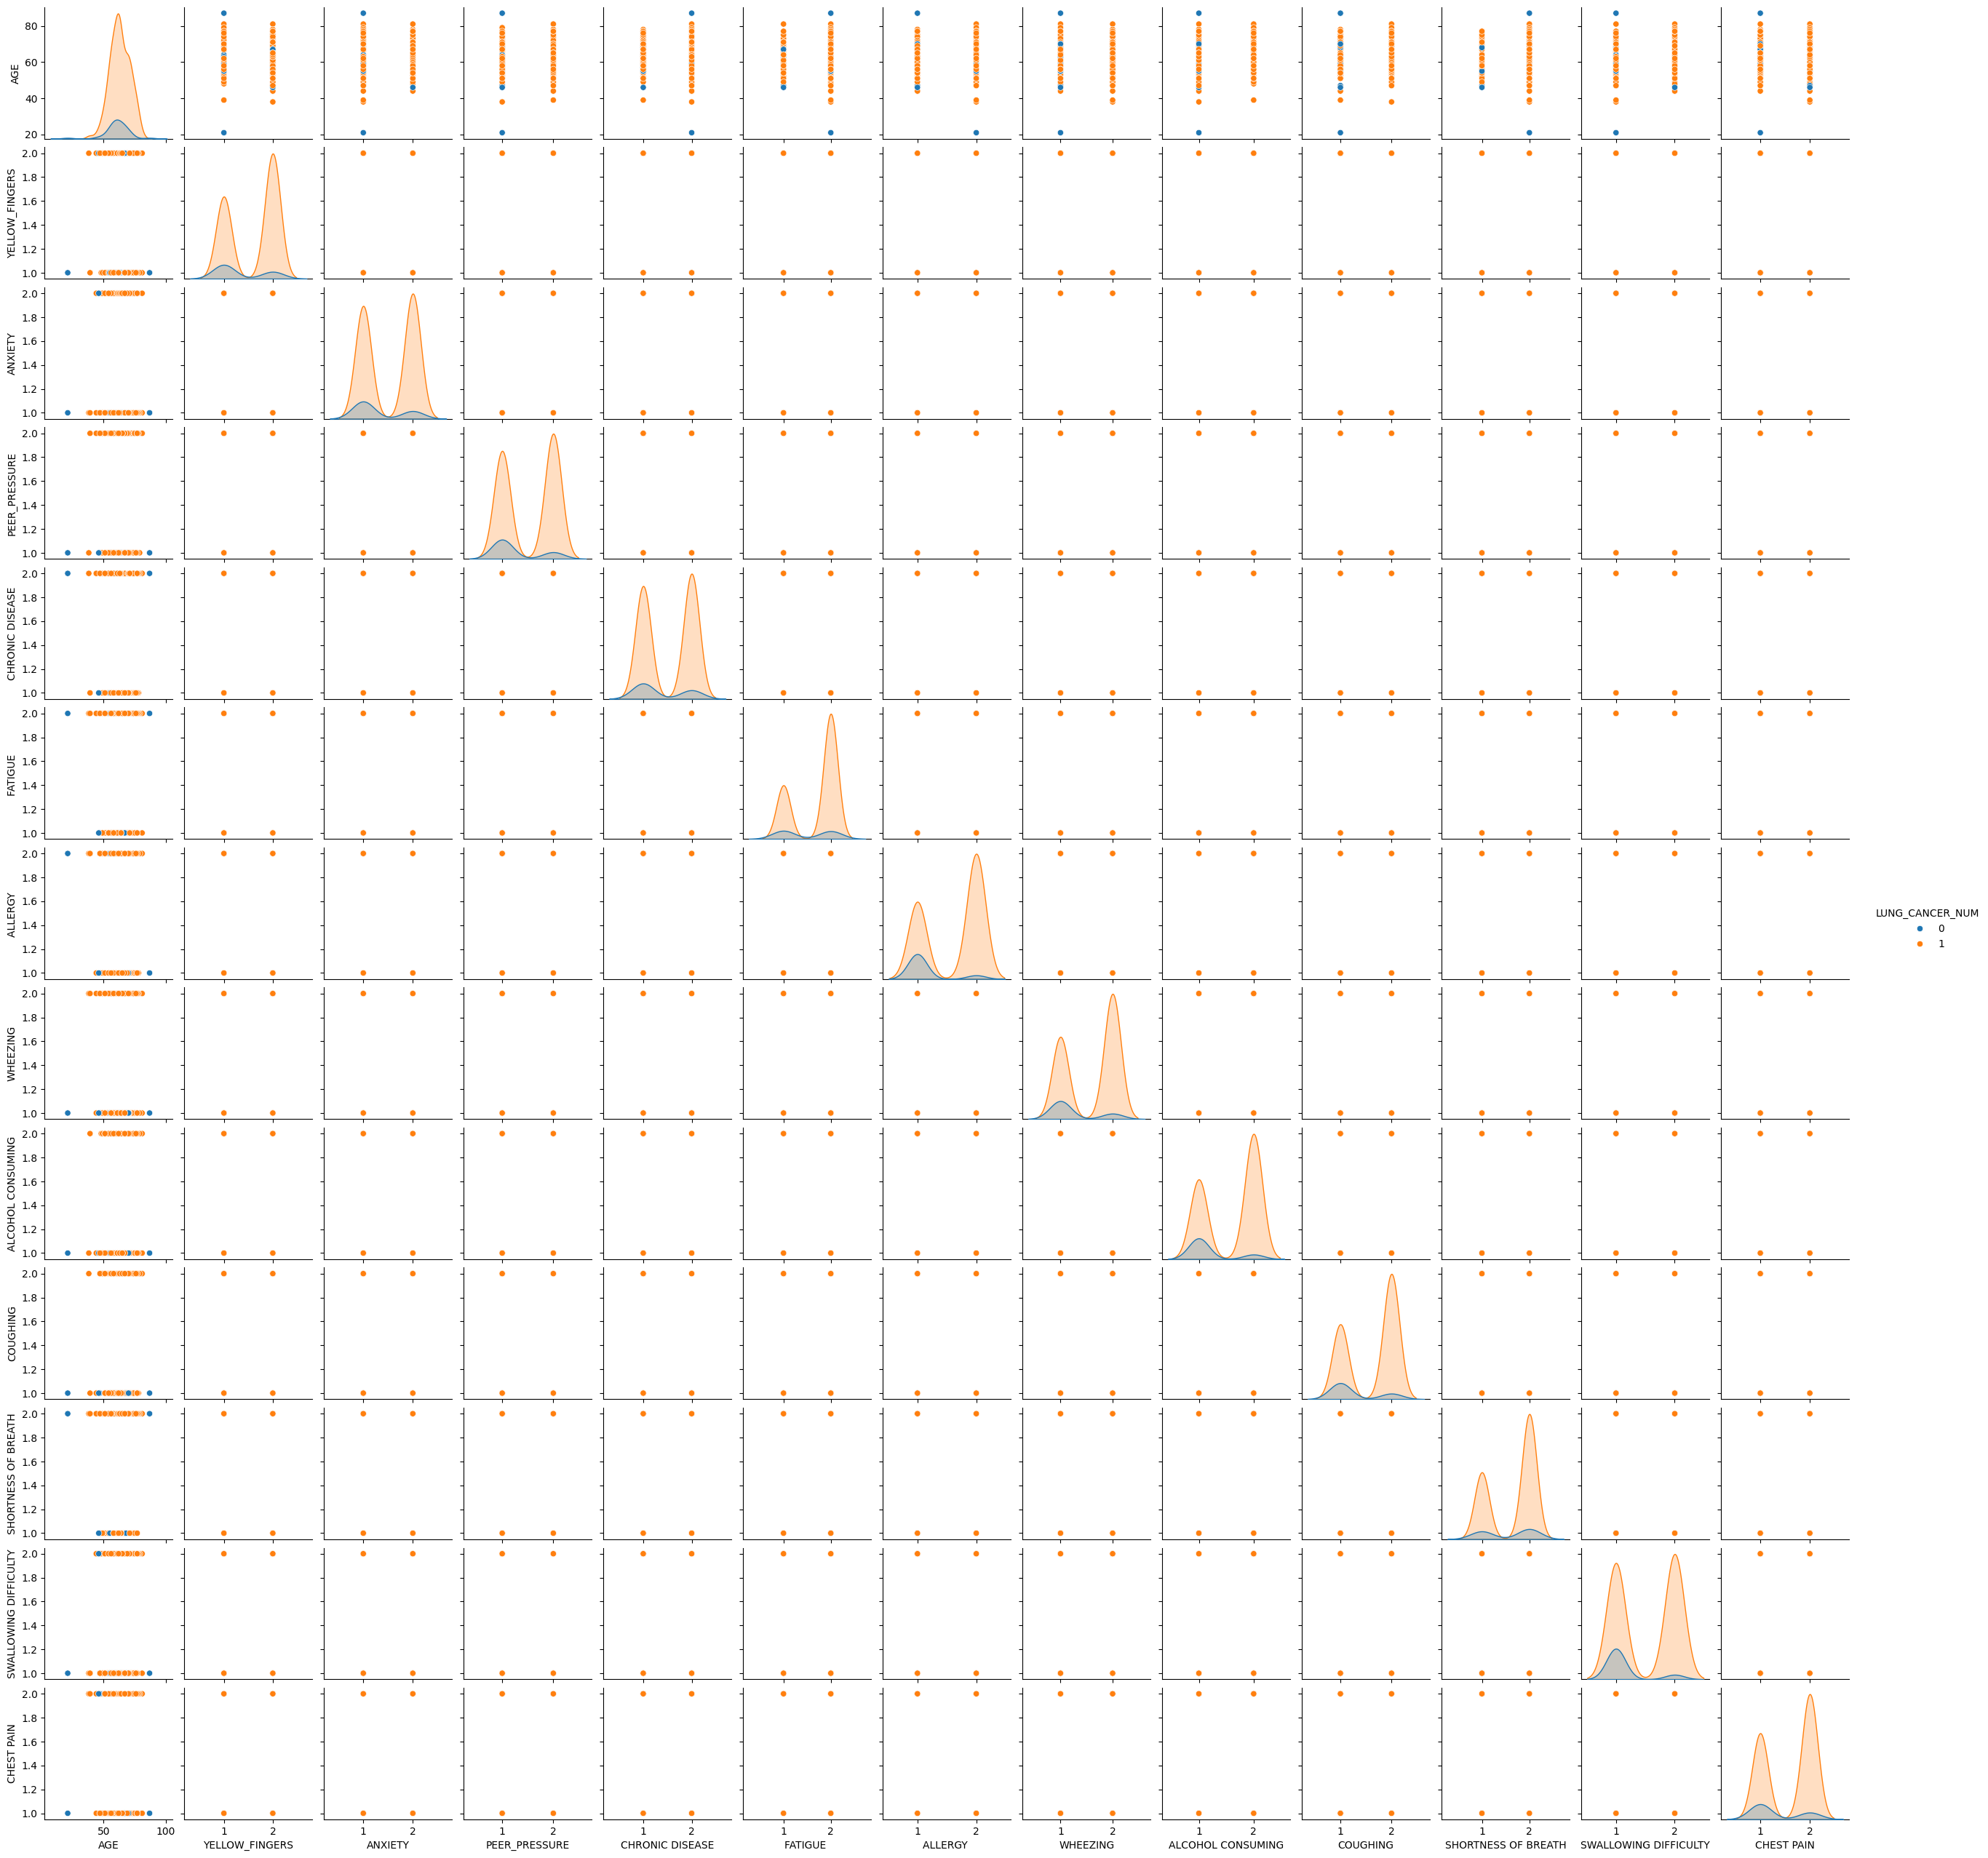

In [22]:
# Select numerical variables
numerical_vars = ['AGE', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ',
                  'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY',
                  'CHEST PAIN', 'LUNG_CANCER_NUM']

# Create a scatter plot matrix
sns.pairplot(df[numerical_vars], hue='LUNG_CANCER_NUM', diag_kind='kde', height=2)
plt.show()

 Create box plots to compare the distribution of age or other numerical variables across different categories of categorical variables (e.g., gender, smoking) to further explore the relationships between variables.

<ipython-input-23-24e2dcc5cfc6>:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df['GENDER'] == 'M']['AGE'], df[df['GENDER'] == 'F']['AGE']], labels=['Male', 'Female'])


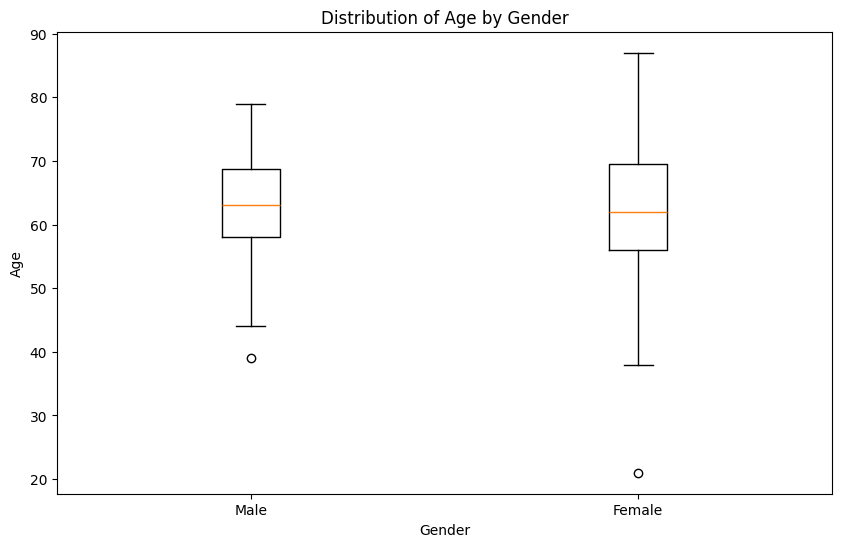

<ipython-input-23-24e2dcc5cfc6>:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df['SMOKING'] == 1]['AGE'], df[df['SMOKING'] == 2]['AGE']], labels=['Smoker', 'Non-smoker'])


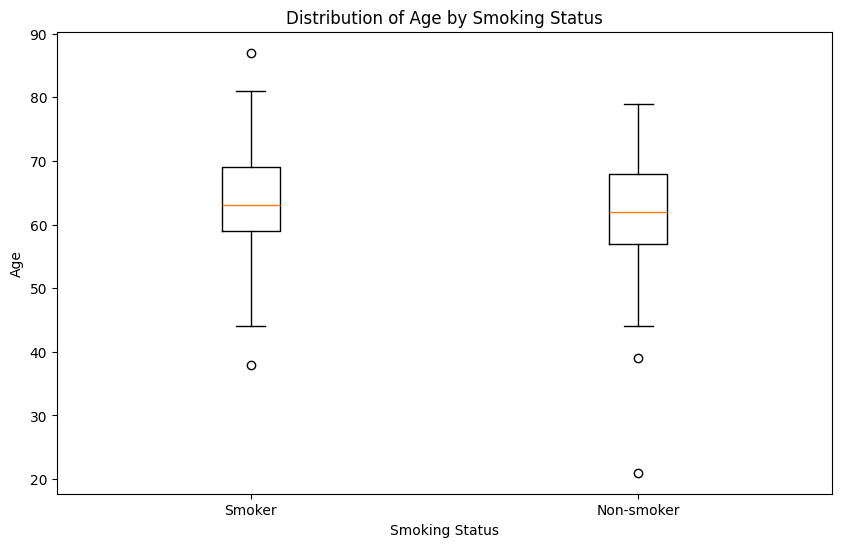

<ipython-input-23-24e2dcc5cfc6>:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df['LUNG_CANCER'] == 'YES']['ANXIETY'], df[df['LUNG_CANCER'] == 'NO']['ANXIETY']], labels=['Lung Cancer', 'No Lung Cancer'])


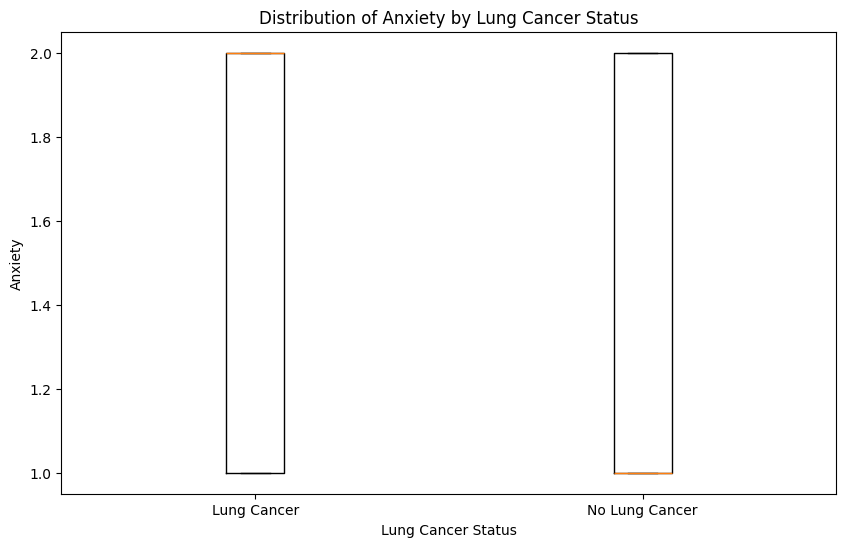

In [23]:
# Box plot of age by gender
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['GENDER'] == 'M']['AGE'], df[df['GENDER'] == 'F']['AGE']], labels=['Male', 'Female'])
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Distribution of Age by Gender')
plt.show()

# Box plot of age by smoking status
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['SMOKING'] == 1]['AGE'], df[df['SMOKING'] == 2]['AGE']], labels=['Smoker', 'Non-smoker'])
plt.xlabel('Smoking Status')
plt.ylabel('Age')
plt.title('Distribution of Age by Smoking Status')
plt.show()

# Box plot of anxiety by lung cancer status
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['LUNG_CANCER'] == 'YES']['ANXIETY'], df[df['LUNG_CANCER'] == 'NO']['ANXIETY']], labels=['Lung Cancer', 'No Lung Cancer'])
plt.xlabel('Lung Cancer Status')
plt.ylabel('Anxiety')
plt.title('Distribution of Anxiety by Lung Cancer Status')
plt.show()

The dataset used for the analysis is called "survey lung cancer.csv". It contains information about patients, including their demographics, lifestyle factors, and medical conditions, with the target variable being the presence or absence of lung cancer (LUNG_CANCER).

Analysis Summary:

Data Exploration: The initial steps involved loading the data into a pandas DataFrame, checking for missing values, and understanding the data types of each column. Additionally, basic descriptive statistics and value counts were calculated to gain an overview of the data distribution.

Data Analysis:

The relationship between lung cancer and potential risk factors was examined using correlation analysis and contingency tables with chi-squared tests.
Moderate positive correlations were found between lung cancer and variables like allergy, alcohol consumption, swallowing difficulty, wheezing, and coughing, suggesting they might be potential risk factors.
While not statistically significant, a higher percentage of lung cancer cases were observed among smokers and males.
The average age of lung cancer patients was slightly higher than non-lung cancer patients but not significantly different.
Data Visualization:

Various visualizations were created to better understand the relationships between variables and lung cancer.
These included histograms to analyze age distributions, bar charts to compare proportions across different categories, scatter plot matrices to visualize relationships between numerical variables, and box plots to examine the distribution of variables across categories.
Key Findings:

Potential risk factors for lung cancer identified include allergy, alcohol consumption, swallowing difficulty, wheezing, and coughing.
A higher prevalence of lung cancer was observed in smokers and males, though not statistically significant in this analysis.
Age was not found to be a significant differentiating factor between lung cancer patients and non-lung cancer patients.
Insights and Next Steps:

Further investigation with larger datasets and advanced statistical models is recommended to validate the findings and establish stronger relationships.
Exploring interactions between different risk factors and their combined effect on lung cancer development is also suggested.